In [1]:
import json, glob, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from operator import itemgetter
from IPython.display import display, Markdown

In [2]:
def display_experiment(experiment):
    display(Markdown(f'## {experiment["concept"]["label"]} ({experiment["concept"]["id"]})'))
    display(Markdown(experiment["concept"]["definition"]))
    display(Markdown("### Confusion matrix"))
    cm = pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"])
    df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
    ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    ax.set_title(experiment["concept"]["label"])
    ax.set(xlabel='LLM', ylabel='KG')
    plt.show()
    df = pd.DataFrame.from_records(experiment["data"])
    df_fp = df[((df["actual"] == 'negative') & (df["predicted"] == 'positive'))][["label", "description", "rationale"]]
    if len(df_fp) > 0:
        df_fp_styler = df_fp.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### LLM positive, KG negative"))
        display(df_fp_styler)
    df_fn = df[((df["actual"] == 'positive') & (df["predicted"] == 'negative'))][["label", "description", "rationale"]]
    if len(df_fn) > 0:
        df_fn_styler = df_fn.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### LLM negative, KG positive"))
        display(df_fn_styler)

In [3]:
experiments = [ experiment for experiment in json.load(open('wd_gpt-4_description_from_wikipedia_results.json', 'r')) if "confusion_matrix" in experiment ]

In [4]:
experiment_df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": f'{pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC:.1%}',
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    }
    for experiment in experiments ]).sort_values("kappa", ascending=False)
experiment_df[["name", "kappa", "SOA9", "ACC", "FP", "FN", "POP"]]

,name,kappa,SOA9,ACC,FP,FN,POP
10,Cities of Japan,1.00,High,100.0%,0,0,40
5,Equestrian sport,1.00,High,100.0%,0,0,40
14,Art movement,1.00,High,100.0%,0,0,40
11,Catholic higher education,0.95,High,97.5%,1,0,40
17,Indigenous peoples of the Americas,0.90,High,95.0%,0,2,40
19,Natural science,0.85,High,92.5%,0,3,40
16,Chronology,0.80,High,90.0%,1,3,40
4,Microcomputer,0.75,Tentative,87.5%,0,5,40
12,Village (Japan),0.75,Tentative,87.5%,0,5,40
18,Esports,0.75,Tentative,87.5%,1,4,40


In [5]:
experiment_df.describe()

,kappa,FP,FN,POP
count,20.000000,20.000000,20.000000,20.0
mean,0.675000,1.250000,5.250000,40.0
std,0.255209,2.403397,4.897636,0.0
min,0.150000,0.000000,0.000000,40.0
25%,0.525000,0.000000,0.750000,40.0
50%,0.750000,0.000000,4.500000,40.0
75%,0.862500,1.250000,8.250000,40.0
max,1.000000,10.000000,15.000000,40.0


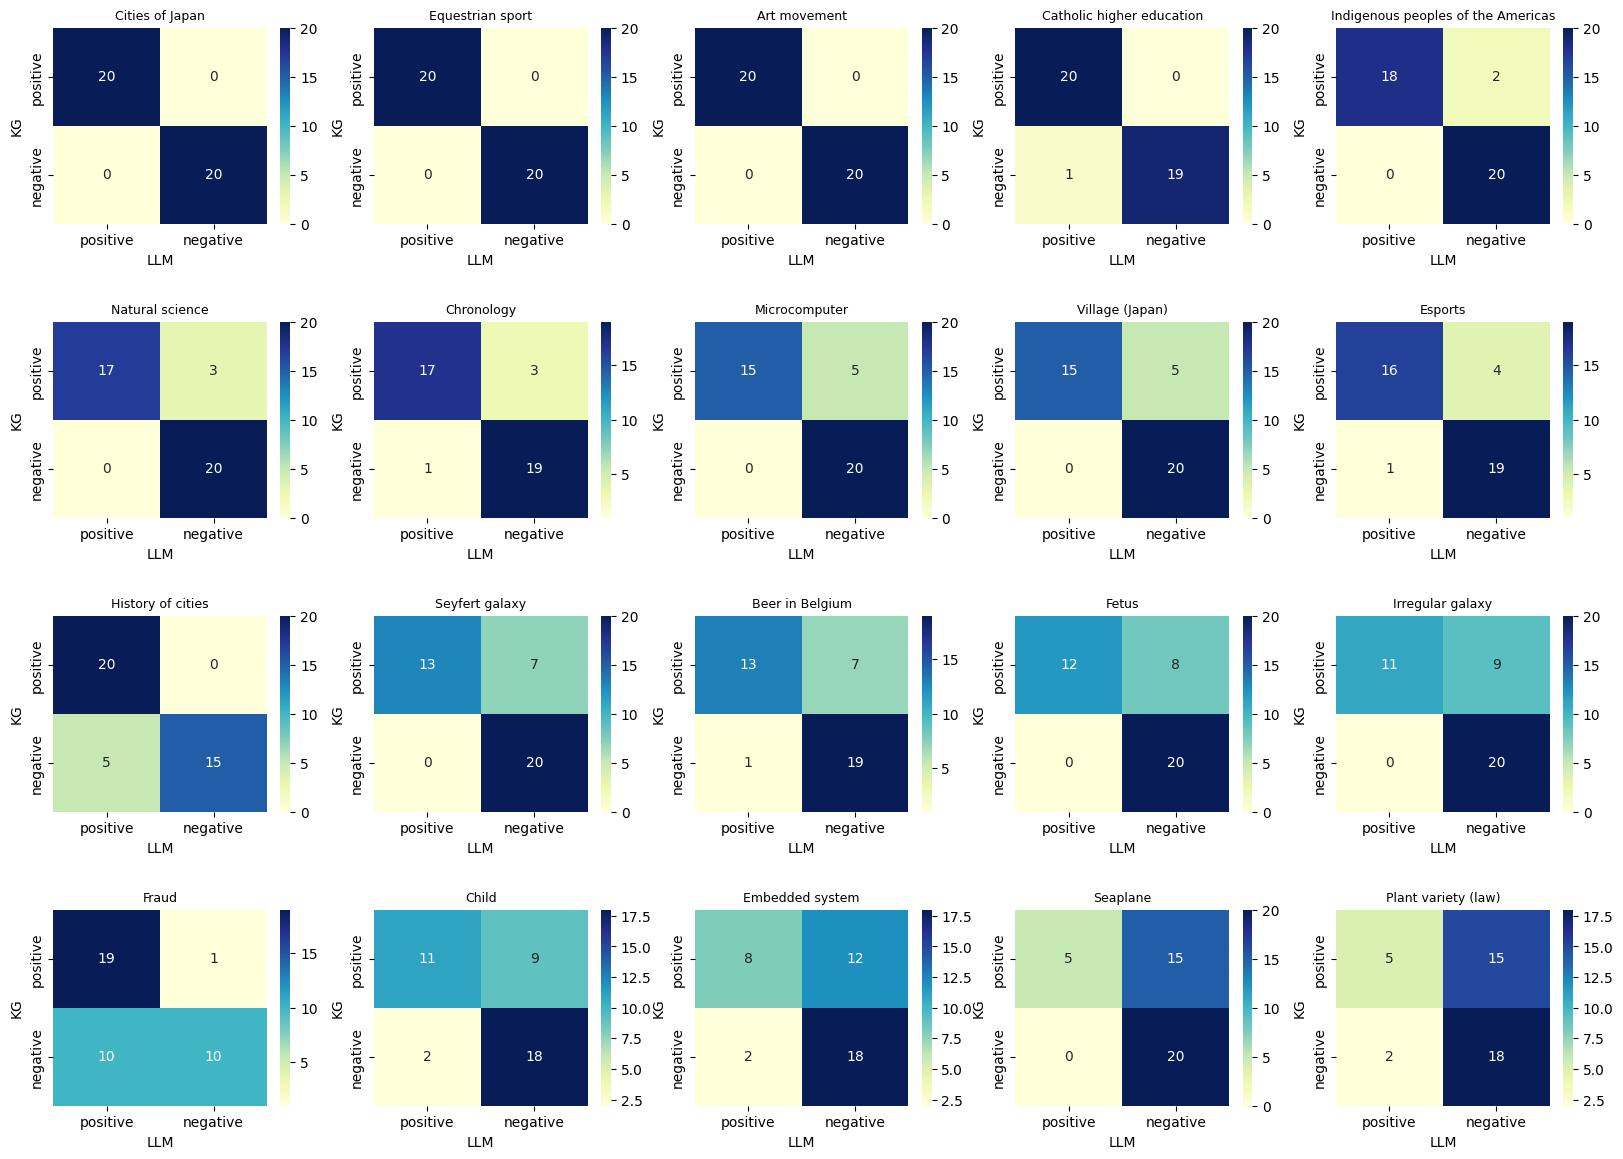

In [6]:
fig = plt.figure(figsize=(20,14))
gs = fig.add_gridspec(4, 5, hspace=0.5)
axes = gs.subplots()
cms = [ (experiment["name"], pycm.ConfusionMatrix(matrix=experiment["experiment"]["confusion_matrix"])) for experiment in experiment_df.to_dict('records')  ]
for ax, (name, cm) in zip(axes.flat, cms):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name, wrap=True, fontsize=9)
    ax.set(xlabel='LLM', ylabel='KG')
for ax in axes.flat[len(cms):]:
    ax.set_visible(False)
plt.show()

## Cities of Japan (http://www.wikidata.org/entity/Q494721)

Cities of Japan: A city (市, shi) is a local administrative unit in Japan. Cities are ranked on the same level as towns (町, machi) and villages (村, mura), with the difference that they are not a component of districts (郡, gun). Like other contemporary administrative units, they are defined by the Local Autonomy Law of 1947.

### Confusion matrix

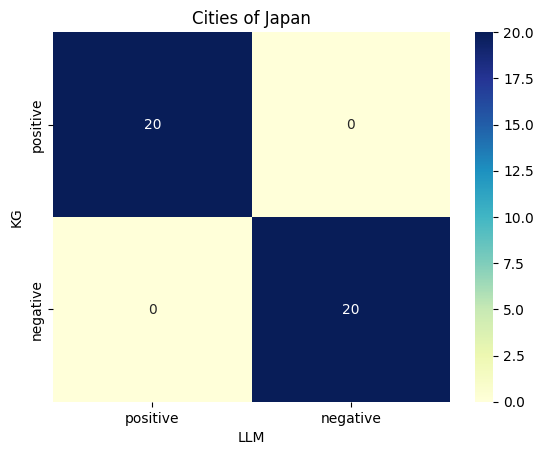

## Equestrian sport (http://www.wikidata.org/entity/Q902378)

Equestrian sport: Equestrian sports are sports that use horses as a main part of the sport. This usually takes the form of the rider being on the horse's back, or the horses pulling some sort of horse-drawn vehicle.

### Confusion matrix

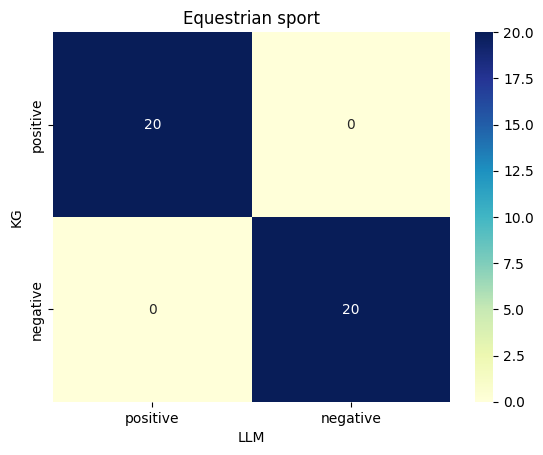

## Art movement (http://www.wikidata.org/entity/Q968159)

Art movement: An art movement is a tendency or style in art with a specific common philosophy or goal, followed by a group of artists during a specific period of time, (usually a few months, years or decades) or, at least, with the heyday of the movement defined within a number of years. Art movements were especially important in modern art, when each consecutive movement was considered a new avant-garde movement. Western art had been, from the Renaissance up to the middle of the 19th century, underpinned by the logic of perspective and an attempt to reproduce an illusion of visible reality (figurative art). By the end of the 19th century many artists felt a need to create a new style which would encompass the fundamental changes taking place in technology, science and philosophy (abstract art).



### Confusion matrix

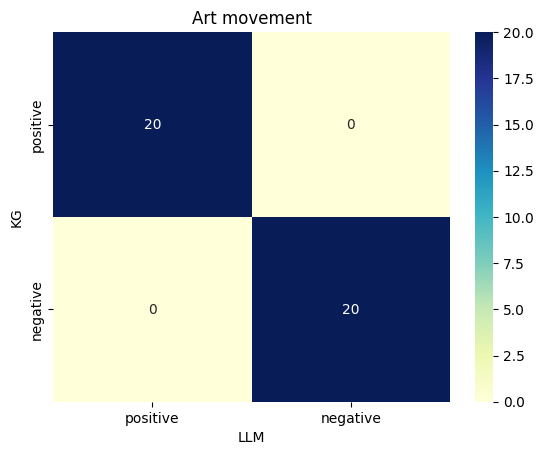

## Catholic higher education (http://www.wikidata.org/entity/Q557206)

Catholic higher education: Catholic higher education includes universities, colleges, and other institutions of higher education privately run by the Catholic Church, typically by religious institutes. Those tied to the Holy See are specifically called pontifical universities.
By definition, Catholic canon law states that \"A Catholic school is understood to be one which is under control of the competent ecclesiastical authority or of a public ecclesiastical juridical person, or one which in a written document is acknowledged as Catholic by the ecclesiastical authority\" (Can. 803). Although some schools are deemed \"Catholic\" because of their identity and a great number of students enrolled are Catholics, it is also stipulated in canon law that \"no school, even if it is in fact Catholic, may bear the title 'Catholic school' except by the consent of the competent ecclesiastical authority\" (Can. 803 §3).The Dominican Order was \"the first order instituted by the Church with an academic mission\", founding studia conventualia in every convent of the order, and studia generalia at the early European universities such as the University of Bologna and the University of Paris. In Europe, most universities with medieval history were founded as Catholic. Many of them were rescinded to government authorities in the Modern era. Some, however, remained Catholic, while new ones were established alongside the public ones. The Catholic Church is still the largest non-governmental provider of higher education in the world. Many of them are still internationally competitive. According to the census of the Vatican's Congregation for Catholic Education, the total number of Catholic universities and higher education institutions around the world is 1,358. On the other hand, the United States Conference of Catholic Bishops counts it at 1,861. The Catholic religious order with the highest number of universities around the world today is the Society of Jesus with 114.Like other private schools, Catholic universities and colleges are generally nondenominational, in that they accept anyone regardless of religious affiliation, nationality, ethnicity, or civil status, provided the admission or enrollment requirements and legal documents are submitted, and rules and regulations are obeyed for a fruitful life on campus. However, non-Catholics, whether Christian or not, may or may not participate in otherwise required campus activities, particularly those of a religious nature.

### Confusion matrix

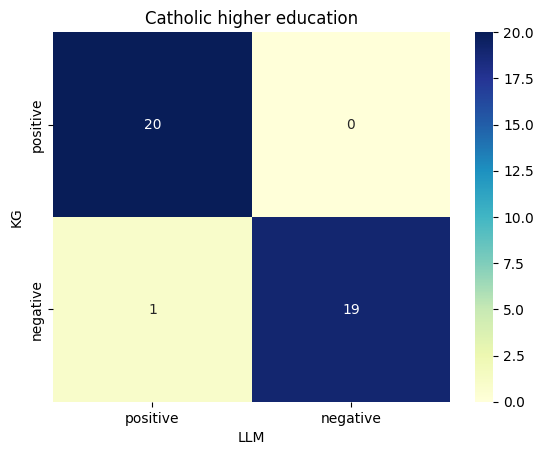

### LLM positive, KG negative

label,description,rationale
Rachol Seminary,"Rachol Seminary: The Rachol Seminary, also known today as Patriarchal Seminary of Rachol, is the diocesan major seminary of the Primatial Catholic Archdiocese of Goa and Daman in Rachol, Goa, India.","The Rachol Seminary is described as a diocesan major seminary of the Primatial Catholic Archdiocese of Goa and Daman in Rachol, Goa, India. This indicates that it is an institution of higher education that is run by the Catholic Church, specifically by a Catholic Archdiocese. Therefore, based on the definition provided, the Rachol Seminary can be classified as a Catholic higher education institution."


## Indigenous peoples of the Americas (http://www.wikidata.org/entity/Q36747)

Indigenous peoples of the Americas: The Indigenous peoples of the Americas are the original inhabitants of the Western Hemisphere, and have occupied the Americas since prior to European colonization of the Americas. They are a diverse group of peoples, with a wide range of cultures, languages, and ways of life.
Some Indigenous peoples in the Americas have historically been hunter-gatherers, while others traditionally practice agriculture and aquaculture. In the Amazon basin in present-day South America, some Indigenous peoples still live as hunter-gatherers while those in other regions may maintain their traditional lifestyles to a lesser extent.Some Indigenous peoples have traditionally depended heavily on agriculture, and others on a mix of farming, hunting, and gathering. In some regions, Indigenous peoples have created pre-contact monumental architecture, large-scale organized cities, city-states, chiefdoms, states, kingdoms, republics, confederacies, and empires. These societies have had varying degrees of knowledge of engineering, architecture, mathematics, astronomy, writing, physics, medicine, planting and irrigation, geology, mining, metallurgy, sculpture, and gold smithing.
Many parts of the Americas are still populated by Indigenous peoples; some countries have sizeable populations, especially Bolivia, Canada, Chile, Ecuador, Guatemala, Mexico, Peru, and the United States. At least a thousand different Indigenous languages are spoken in the Americas, where there are also 574 federally recognized tribes in the United States alone. Several of these languages are recognized as official by several governments such as those in Bolivia, Peru, Paraguay and Greenland. Some, such as Quechua, Arawak, Aymara, Guaraní, Mayan, and Nahuatl, count their speakers in the millions. Whether contemporary Indigenous people live in rural communities or urban ones, many also maintain additional aspects of their cultural practices to varying degrees, including religion, social organization, and subsistence practices. Like most cultures, over time, cultures specific to many Indigenous peoples have also evolved, preserving traditional customs but also adjusting to meet modern needs. Some Indigenous peoples still live in relative isolation from Western culture and a few are still counted as uncontacted peoples.



### Confusion matrix

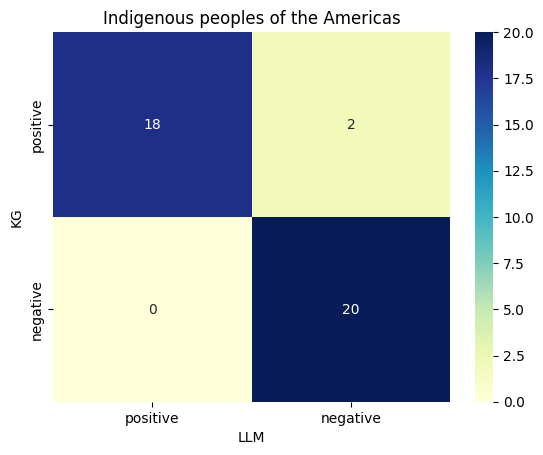

### LLM negative, KG positive

label,description,rationale
Taboso people,Taboso people,The text does not provide enough information to assert that Taboso people is a(n) Indigenous peoples of the Americas.
Bamoa,Bamoa,"The provided definition and information do not mention or provide any details about Bamoa. Therefore, based on the given information, it is not possible to provide an argument for the assertion that Bamoa is an Indigenous peoples of the Americas."


## Natural science (http://www.wikidata.org/entity/Q7991)

Natural science: Natural science is one of the branches of science concerned with the description, understanding and prediction of natural phenomena, based on empirical evidence from observation and experimentation. Mechanisms such as peer review and repeatability of findings are used to try to ensure the validity of scientific advances.
Natural science can be divided into two main branches: life science and physical science. Life science is alternatively known as biology, and physical science is subdivided into branches: physics, chemistry, earth science, and astronomy. These branches of natural science may be further divided into more specialized branches (also known as fields). As empirical sciences, natural sciences use tools from the formal sciences, such as mathematics and logic, converting information about nature into measurements which can be explained as clear statements of the \"laws of nature\".Modern natural science succeeded more classical approaches to natural philosophy, usually traced to Taoist traditions in Asia and to ancient Greece in Europe. Galileo, Kepler, Descartes, Bacon, and Newton debated the benefits of using approaches which were more mathematical and more experimental in a methodical way. Still, philosophical perspectives, conjectures, and presuppositions, often overlooked, remain necessary in natural science. Systematic data collection, including discovery science, succeeded natural history, which emerged in the 16th century by describing and classifying plants, animals, minerals, and so on. Today, \"natural history\" suggests observational descriptions aimed at popular audiences.



### Confusion matrix

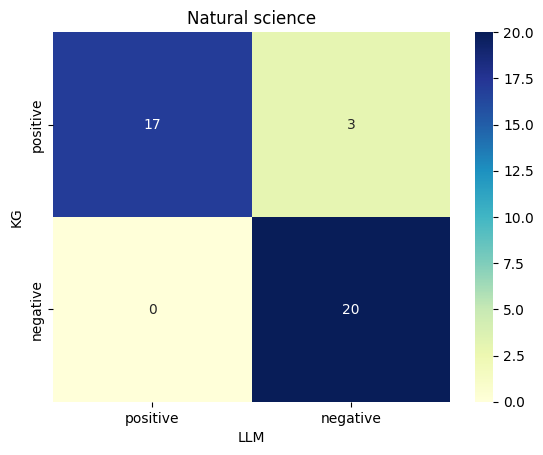

### LLM negative, KG positive

label,description,rationale
creationism,"creationism: Creationism is the religious belief that nature, and aspects such as the universe, Earth, life, and humans, originated with supernatural acts of divine creation. In its broadest sense, creationism includes a continuum of religious views, which vary in their acceptance or rejection of scientific explanations such as evolution that describe the origin and development of natural phenomena.The term creationism most often refers to belief in special creation; the claim that the universe and lifeforms were created as they exist today by divine action, and that the only true explanations are those which are compatible with a Christian fundamentalist literal interpretation of the creation myth found in the Bible's Genesis creation narrative. Since the 1970s, the most common form of this has been Young Earth creationism which posits special creation of the universe and lifeforms within the last 10,000 years on the basis of flood geology, and promotes pseudoscientific creation science. From the 18th century onward, Old Earth creationism accepted geological time harmonized with Genesis through gap or day-age theory, while supporting anti-evolution. Modern old-Earth creationists support progressive creationism and continue to reject evolutionary explanations. Following political controversy, creation science was reformulated as intelligent design and neo-creationism.Mainline Protestants and the Catholic Church reconcile modern science with their faith in Creation through forms of theistic evolution which hold that God purposefully created through the laws of nature, and accept evolution. Some groups call their belief evolutionary creationism. Less prominently, there are also members of the Islamic and Hindu faiths who are creationists. Use of the term \""creationist\"" in this context dates back to Charles Darwin's unpublished 1842 sketch draft for what became On the Origin of Species, and he used the term later in letters to colleagues. In 1873, Asa Gray published an article in The Nation saying a \""special creationist\"" who held that species \""were supernaturally originated just as they are, by the very terms of his doctrine places them out of the reach of scientific explanation.\""","Based on the provided definitions, it would be challenging to argue that creationism is a natural science. Natural science is defined as a branch of science that deals with the description, understanding, and prediction of natural phenomena, based on empirical evidence from observation and experimentation. It uses mechanisms such as peer review and repeatability of findings to ensure the validity of scientific advances. On the other hand, creationism is described as a religious belief that nature and aspects such as the universe, Earth, life, and humans, originated with supernatural acts of divine creation. It often rejects scientific explanations such as evolution that describe the origin and development of natural phenomena. While both natural science and creationism deal with understanding the natural world and its origins, they differ significantly in their methodologies and basis for understanding. Natural science relies on empirical evidence, observation, and experimentation, while creationism is based on religious beliefs and often rejects scientific explanations. Therefore, based on the provided definitions, it would be difficult to argue that creationism is a natural science."
geography of Burkina Faso,"geography of Burkina Faso: Burkina Faso (formerly Upper Volta) is a landlocked Sahel country that shares borders with six nations. It lies between the Sahara desert and the Gulf of Guinea, south of the loop of the Niger River, mostly between latitudes 9° and 15°N (a small area is north of 15°), and longitudes 6°W and 3°E. The land is green in the south, with forests and fruit trees, and semi-arid in the north. Most of central Burkina Faso lies on a savanna plateau, 198–305 metres (650–1,001 f

## Chronology (http://www.wikidata.org/entity/Q130788)

Chronology: Chronology (from Latin chronologia, from Ancient Greek χρόνος, chrónos, \"time\"; and -λογία, -logia) is the science of arranging events in their order of occurrence in time. Consider, for example, the use of a timeline or sequence of events. It is also \"the determination of the actual temporal sequence of past events\".Chronology is a part of periodization. It is also a part of the discipline of history including earth history, the earth sciences, and study of the geologic time scale.

### Confusion matrix

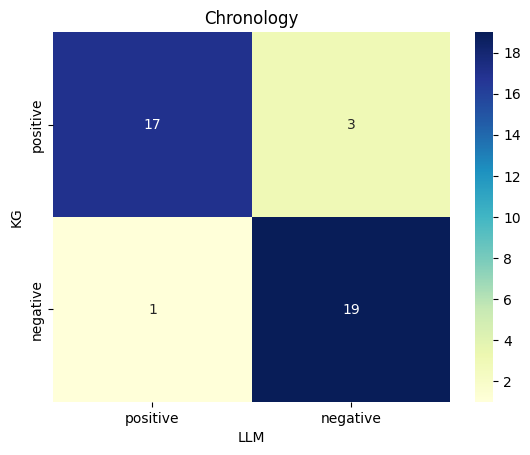

### LLM positive, KG negative

label,description,rationale
Cueva de las Manos,Cueva de las Manos,"The Cueva de las Manos, known for its ancient cave paintings, can be considered a chronology based on the definition provided. The paintings within the cave represent a sequence of events or activities that occurred in the past, thus providing a temporal sequence of past events. The study of these paintings and their order of occurrence can be seen as a part of the discipline of history and earth sciences, which falls under the concept of chronology. Therefore, Cueva de las Manos can be seen as a chronology."


### LLM negative, KG positive

label,description,rationale
Bold Beautiful Biathlon,Bold Beautiful Biathlon,"Based on the provided information, it's not possible to argue that Bold Beautiful Biathlon is a Chronology. The definition of Chronology is the science of arranging events in their order of occurrence in time, and there is no information given that suggests the Bold Beautiful Biathlon involves arranging events in their order of occurrence in time. Without additional information about the Bold Beautiful Biathlon, we cannot assert that it is a Chronology."
Dieux du Stade,Dieux du Stade,"The provided information does not give any details or context that would allow for an argument to be made that Dieux du Stade is a chronology. The definition of chronology involves the arrangement of events in their order of occurrence in time, and there is no information given about Dieux du Stade that would suggest it fits this definition."
Malanka,"Malanka: Malanka (Ukrainian: Маланка, or Ukrainian: Щедрий Вечір, romanized: Shchedryi Vechir, lit. 'bounteous evening') is a Ukrainian folk holiday celebrated on 13 January, which is New Year's Eve in accordance with the 31 December of Julian calendar (see Old New Year). The festivities were historically centred around house-to-house visiting by groups of young men, costumed as characters from a folk tale of pre-Christian origin, as well as special food and drink. The context of the rituals has changed, but some elements continue to the present.","Based on the provided definition, it would be incorrect to assert that Malanka is a chronology. Chronology is the science of arranging events in their order of occurrence in time, and it involves the determination of the actual temporal sequence of past events. Malanka, on the other hand, is a Ukrainian folk holiday celebrated on a specific date. While it is an event that occurs in time, it does not involve the arrangement or determination of a sequence of events. Therefore, Malanka does not fit the definition of a chronology."


## Microcomputer (http://www.wikidata.org/entity/Q32738)

Microcomputer: A microcomputer is a small, relatively inexpensive computer having a central processing unit (CPU) made out of a microprocessor. The computer also includes memory and input/output (I/O) circuitry together mounted on a printed circuit board (PCB). Microcomputers became popular in the 1970s and 1980s with the advent of increasingly powerful microprocessors. The predecessors to these computers, mainframes and minicomputers, were comparatively much larger and more expensive (though indeed present-day mainframes such as the IBM System z machines use one or more custom microprocessors as their CPUs). Many microcomputers (when equipped with a keyboard and screen for input and output) are also personal computers (in the generic sense). An early use of the term \"personal computer\" in 1962 predates microprocessor-based designs. (See \"Personal Computer: Computers at Companies\" reference below). A \"microcomputer\" used as an embedded control system may have no human-readable input and output devices. \"Personal computer\" may be used generically or may denote an IBM PC compatible machine.
The abbreviation \"micro\" was common during the 1970s and 1980s, but has since fallen out of common usage.

### Confusion matrix

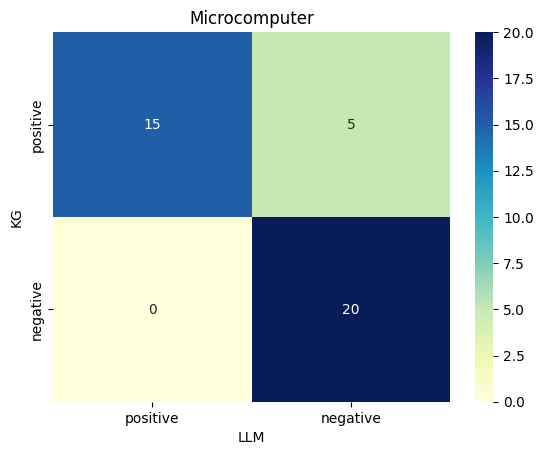

### LLM negative, KG positive

label,description,rationale
Oric Atmos computer - CnAM 43734,Oric Atmos computer - CnAM 43734,"The definition of a microcomputer includes a small, relatively inexpensive computer with a CPU made out of a microprocessor, memory, and input/output circuitry mounted on a printed circuit board. While the specific details about the Oric Atmos computer - CnAM 43734 are not provided, it is reasonable to infer that as a computer, it would have these components. Therefore, based on the given definition, the Oric Atmos computer - CnAM 43734 can be considered a microcomputer."
Sony HB-501,Sony HB-501,The text does not provide sufficient information to assert that Sony HB-501 is a Microcomputer.
Thomson MO5 - CnAM 43737,Thomson MO5 - CnAM 43737,"The definition of a microcomputer includes it being a small, relatively inexpensive computer with a CPU made out of a microprocessor, along with memory and I/O circuitry mounted on a PCB. While the text does not provide specific details about the Thomson MO5 - CnAM 43737, it is implied that it could be a microcomputer if it fits these criteria. If the Thomson MO5 - CnAM 43737 is indeed a small, relatively inexpensive computer with a microprocessor-based CPU, memory, and I/O circuitry on a PCB, then it would fit the definition of a microcomputer. However, without specific information about the Thomson MO5 - CnAM 43737, a definitive conclusion cannot be reached based solely on the provided definition of a microcomputer."
Primo,Primo,"The text does not provide any information on the entity Primo. Therefore, based on the given information, it is not possible to argue that Primo is a Microcomputer."
Daewoo CPC-300,"Daewoo CPC-300: Winia Electronics, formerly named Daewoo Electronics, is a South Korean home appliances company and a member of South Korean Winia Group. Established in 1971, it has since grown into a global business with more than 64 production sites, research and development and sales centres in more than 40 countries worldwide. Daewoo Electronics Sales UK (DESUK) was established in November 1993. It is the third largest electronics firm of South Korea after Samsung and LG. The company manufactures a range of electronics and home appliances also some automotive electronic equipments and accessories by being the OEM to assist its parent company's motor vehicle subsidiaries Daewoo Motors which is currently divided among US based Korean automotive manufacturer GM Korea & Tata Daewoo the manufacturer of Daewoo Heavy Diesel Commercial vehicles.","The text does not provide sufficient information to assert that Daewoo CPC-300 is a microcomputer. The description of Daewoo CPC-300 does not mention any features or characteristics that would classify it as a microcomputer according to the provided definition. It only discusses the company's history, its range of products, and its position in the South Korean electronics market. Therefore, based on the given information, we cannot definitively categorize Daewoo CPC-300 as a microcomputer."


## Village (Japan) (http://www.wikidata.org/entity/Q4174776)

Village (Japan): A village (村, mura) is a local administrative unit in Japan.
It is a local public body along with prefecture (県, ken, or other equivalents), city (市, shi), and town (町, chō, sometimes machi). Geographically, a village's extent is contained within a prefecture.
It is larger than an actual settlement, being in actuality a subdivision of a rural district (郡, gun), which are subdivided into towns and villages with no overlap and no uncovered area.
As a result of mergers and elevation to higher statuses, the number of villages in Japan is decreasing.
As of 2006, 13 prefectures no longer have any villages: Tochigi (since March 20, 2006), Fukui (since March 3, 2006), Ishikawa (since March 1, 2005), Shizuoka (since July 1, 2005), Hyōgo (since April 1, 1999), Mie (since November 1, 2005), Shiga (since January 1, 2005), Hiroshima (since November 5, 2004), Yamaguchi (since March 20, 2006), Ehime (since January 16, 2005), Kagawa (since April 1, 1999), Nagasaki (since October 1, 2005), and Saga (since March 20, 2006).
Atarashiki-mura (which is an autonomous village community) is not included in the list below.



### Confusion matrix

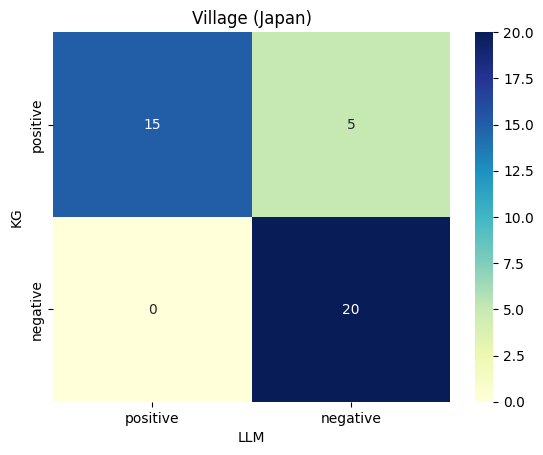

### LLM negative, KG positive

label,description,rationale
Hayashida Immigrant Village,Hayashida Immigrant Village,"The definition provided for a Village (Japan) states that it is a local administrative unit in Japan, a subdivision of a rural district, and is contained within a prefecture. While the specific details about Hayashida Immigrant Village are not provided, the name itself suggests that it is a village located in Japan. Therefore, based on the information provided in the definition of a Village (Japan), it can be argued that Hayashida Immigrant Village is a Village (Japan). However, without additional specific information about Hayashida Immigrant Village, such as its administrative status or its location within a prefecture, this assertion cannot be definitively confirmed."
Yoshino Immigrant Village,Yoshino Immigrant Village,"The Yoshino Immigrant Village can be considered a Village (Japan) based on the given definition. As a village, it would be a local administrative unit within Japan, likely contained within a prefecture. It would be larger than an actual settlement and would be a subdivision of a rural district, which are subdivided into towns and villages with no overlap and no uncovered area. The fact that it is referred to as a ""village"" suggests that it fits within this administrative structure. However, without specific information about its administrative status and geographical location, this assertion is based on the assumption that the term ""village"" is being used in its official administrative sense."
Toyota Immigrant Village,Toyota Immigrant Village,"Based on the provided definition, a village in Japan is a local administrative unit that is a subdivision of a rural district and is contained within a prefecture. While the specific details about Toyota Immigrant Village are not provided, its name suggests that it is a village in Japan. If Toyota Immigrant Village is indeed a local administrative unit, is part of a rural district, and is located within a prefecture in Japan, then it would fit the definition of a Village (Japan). However, without more specific information about Toyota Immigrant Village, it is not possible to definitively assert that it is a Village (Japan) based solely on the provided definition."
Shibetoro,Shibetoro,The text does not provide enough information to assert that Shibetoro is a Village (Japan).
Tachikawa,"Tachikawa: Tachikawa (立川市, Tachikawa-shi) is a city located in the western portion of Tokyo Metropolis, Japan. As of 1 March 2021, the city had an estimated population of 184,383 in 93,428 households, and a population density of 7600 persons per km2. The total area of the city is 24.36 square kilometres (9.41 sq mi).","The given definition and information do not provide sufficient evidence to argue that Tachikawa is a Village in Japan. According to the definition, a village is a local administrative unit in Japan, a subdivision of a rural district, and is contained within a prefecture. However, the information about Tachikawa identifies it as a city located in the western portion of Tokyo Metropolis, not a village. Therefore, based on the provided information, it cannot be asserted that Tachikawa is a Village in Japan."


## Esports (http://www.wikidata.org/entity/Q300920)

Esports: Esports, short for electronic sports, is a form of competition using video games. Esports often takes the form of organized, multiplayer video game competitions, particularly between professional players, individually or as teams.Multiplayer competitions were long a part of video game culture, but were largely between amateurs until the late 2000s, when the advent of online streaming media platforms, particularly YouTube and Twitch, enabled a surge in participation by professional gamers and spectators. By the 2010s, esports was a major part of the video game industry, with many game developers designing for and funding for tournaments and other events. 
Esports first became popular in East Asia, particularly in China and South Korea (which first licensed professional players since 2000) but less so in Japan, whose broad anti-gambling laws which prohibit professional gaming tournaments. Esports are also popular in Europe and the Americas, which host regional and international events.
The most common video game genres associated with esports are multiplayer online battle arena (MOBA), first-person shooter (FPS), fighting, card, battle royale and real-time strategy (RTS) games. Popular esports franchises include League of Legends, Dota, Counter-Strike, Valorant, Overwatch, Street Fighter, Super Smash Bros. and StarCraft. Among the most popular tournaments are the League of Legends World Championship, Dota 2's International, the fighting game-specific Evolution Championship Series (EVO) and Intel Extreme Masters. Many other competitions use a series of league play with sponsored teams, such as the Overwatch League. Although the legitimacy of esports as a true sporting competition remains in question, they have been featured alongside traditional sports in some multinational events in Asia. The International Olympic Committee has discussed their inclusion in future Olympic events.
In the early 2010s, viewership was about 85% male and 15% female, with most viewers between the ages of 18 and 34. By the late 2010s, it was estimated that by 2020, the total audience of esports would grow to 454 million viewers, with revenue increasing to more than US$1 billion, with China accounting for 35% of the global esports revenue.



### Confusion matrix

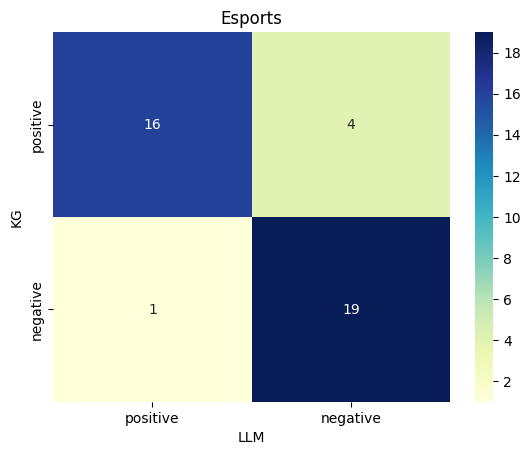

### LLM positive, KG negative

label,description,rationale
men's singles,men's singles,"The concept of Esports encompasses competitions using video games, which can be played by professional players either individually or as teams. The entity ""men's singles"" refers to a competition involving individual male participants. Given that video games can be played individually, it is plausible that a ""men's singles"" category could exist within Esports. This would involve individual male players competing against each other in any of the popular video game genres associated with Esports, such as MOBA, FPS, fighting, card, battle royale, and RTS games. Therefore, based on the provided definition, ""men's singles"" could be considered a part of Esports."


### LLM negative, KG positive

label,description,rationale
Riyadh Masters,Riyadh Masters,"Without specific information about the entity ""Riyadh Masters,"" it is impossible to definitively argue that it is an Esports based solely on the provided definition of Esports. The definition does not mention or imply any connection between Esports and the Riyadh Masters. Therefore, without additional information, we cannot assert that Riyadh Masters is an Esports."
GIGA Television,GIGA Television: GIGA was the brand name of a digital TV channel (also known as GIGA Digital or GIGA TV) and several German television shows. The channel ceased operations in 2009.,"Based on the definition provided, GIGA Television could be considered an Esports if it broadcasted or hosted video game competitions, particularly those involving professional players or teams. If GIGA Television provided a platform for organized, multiplayer video game competitions and enabled participation by professional gamers and spectators, it would fit the definition of an Esports. However, without specific information about the content or programming of GIGA Television, it is not possible to definitively argue that it is an Esports based solely on the provided definition."
Treasure Master,Treasure Master: Treasure Master is a platform game released by ASC Games in 1991 for the Nintendo Entertainment System as part of a contest involving MTV.,"Based on the provided definition of Esports, it is not possible to argue that Treasure Master is an Esport. The definition of Esports involves organized, multiplayer video game competitions, particularly between professional players, individually or as teams. It also mentions that Esports became a major part of the video game industry in the late 2000s with the advent of online streaming media platforms. However, Treasure Master is a platform game released in 1991, and there is no information provided that suggests it was used in organized, multiplayer competitions or that it has a professional player base. Therefore, based on the given definition and information, Treasure Master cannot be classified as an Esport."
2007 EVER OSL,2007 EVER OSL,"The 2007 EVER OSL can be considered an Esports event based on the definition provided. The definition states that Esports often takes the form of organized, multiplayer video game competitions, particularly between professional players, individually or as teams. If the 2007 EVER OSL is an organized competition involving video games, and especially if it involves professional players competing either individually or as teams, it would fit within the definition of Esports. Furthermore, if the 2007 EVER OSL was streamed on platforms like YouTube or Twitch, or if it was part of a series of league play with sponsored teams, it would further align with the definition of Esports."


## History of cities (http://www.wikidata.org/entity/Q30324006)

History of cities: Towns and cities have a long history, although opinions vary on which ancient settlements are truly cities. The benefits of dense settlement included reduced transport costs, exchange of ideas, sharing of natural resources, large local markets, and in some cases amenities such as running water and sewerage. Possible costs would include higher rate of crime, higher mortality rates, higher cost of living, worse pollution, traffic and high commuting times. Cities grow when the benefits of proximity between people and firms are higher than the cost.

### Confusion matrix

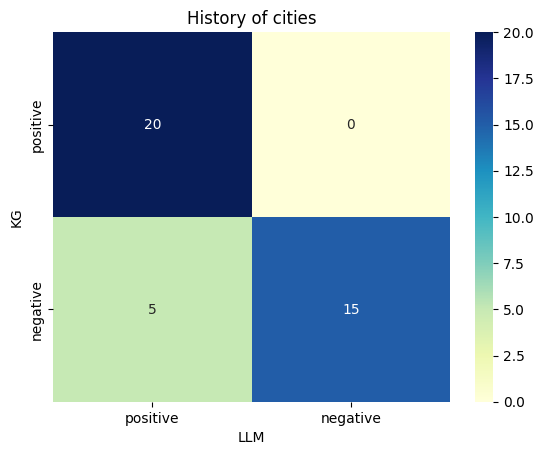

### LLM positive, KG negative

label,description,rationale
Perea,"Perea: Perea or Peraea (Greek: Περαία, \""the country beyond\"") was the portion of the kingdom of Herod the Great occupying the eastern side of the Jordan River valley, from about one third the way down the Jordan River segment connecting the Sea of Galilee and the Dead Sea to about one third the way down the north-eastern shore of the Dead Sea; it did not extend very far to the east. Herod the Great's kingdom was bequeathed to four heirs, of which Herod Antipas received both Perea and Galilee. He dedicated the city Livias in the north of the Dead Sea. In 39 CE, Perea and Galilee were transferred from disfavoured Antipas to Agrippa I by Caligula. With his death in 44 CE, Agrippa's merged territory was made a province again, including Judaea and for the first time, Perea. From that time Perea was part of the shifting Roman provinces to its west: Judaea, and later Syria Palaestina, Palaestina and Palaestina Prima. Attested mostly in Josephus' books, the term was in rarer use in the late Roman period. It appears in Eusebius' Greek language geographical work, Onomasticon, but in the Latin translation by Jerome, Transjordan is used. Gadara or Gadora of Perea (identified as Tell Jadur near Al-Salt) was the chief city or metropolis of Perea (not to be confused with Gadara of the Decapolis−a Hellenistic city). Following the Roman conquest of Judea led by Pompey in 63 BCE, Aulus Gabinius, proconsul of Syria, split the former Hasmonean Kingdom into five districts of legal and religious councils known as synedrion (in Jewish context better known as Sanhedrin) and based at Jerusalem, Jericho, Sepphoris (Galilee), Amathus (Perea) and Gadara (either Perea—Al-Salt, Decapolis—Umm Qais, or biblical Gezer, mentioned by Josephus under a Hellenised form of its Semitic name, Gadara, edited to \""Gazara\"" in the Loeb edition).","Perea's history as a city can be traced back to the time of Herod the Great, who ruled over it as part of his kingdom. The city underwent various changes in leadership and governance, from being bequeathed to Herod Antipas, transferred to Agrippa I, and eventually becoming part of the shifting Roman provinces. The city of Livias was also established in Perea during this time. Furthermore, the city of Gadara in Perea served as a significant metropolis and was one of the five districts of legal and religious councils established following the Roman conquest of Judea. These historical events and changes in Perea's governance and structure reflect the history of cities, as they involve the evolution of settlements, the exchange of power, and the development of local markets and institutions."
History of Marabá,History of Marabá,"The History of Marabá is a History of cities because Marabá is a city itself. The history of this city would include the evolution of its dense settlement, the benefits it offered such as reduced transport costs, exchange of ideas, sharing of natural resources, large local markets, and possibly amenities such as running water and sewerage. It would also cover the possible costs such as higher rate of crime, higher mortality rates, higher cost of living, worse pollution, traffic and high commuting times. The growth of Marabá would be influenced by the balance of these benefits and costs. Therefore, the History of Marabá fits within the concept of the History of cities."
Cenabum,"Cenabum: Cenabum, Gaul (sometimes written Cenabaum or Genabum) was the name of the capital city of the Carnutes, located near the present French city of Orléans. Cenabum was an oppidum and a thriving commercial town on the Loire river. In 52 BC, during the Gallic Wars, the town was taken by Roman general Julius Caesar and integrated into the Roman province of Gallia Lugdunensis. Acts of resistance from the locals who refused to submit to Roman law were severely repressed and resulted in several massacres and the near-total destruction of the town. In the 3rd century, emperor Aurelian visited C

## Seyfert galaxy (http://www.wikidata.org/entity/Q213930)

Seyfert galaxy: Seyfert galaxies are one of the two largest groups of active galaxies, along with quasars. They have quasar-like nuclei (very luminous sources of electromagnetic radiation that are outside of our own galaxy) with very high surface brightnesses whose spectra reveal strong, high-ionisation emission lines, but unlike quasars, their host galaxies are clearly detectable.Seyfert galaxies account for about 10% of all galaxies and are some of the most intensely studied objects in astronomy, as they are thought to be powered by the same phenomena that occur in quasars, although they are closer and less luminous than quasars. These galaxies have supermassive black holes at their centers which are surrounded by accretion discs of in-falling material. The accretion discs are believed to be the source of the observed ultraviolet radiation. Ultraviolet emission and absorption lines provide the best diagnostics for the composition of the surrounding material.Seen in visible light, most Seyfert galaxies look like normal spiral galaxies, but when studied under other wavelengths, it becomes clear that the luminosity of their cores is of comparable intensity to the luminosity of whole galaxies the size of the Milky Way.Seyfert galaxies are named after Carl Seyfert, who first described this class in 1943.



### Confusion matrix

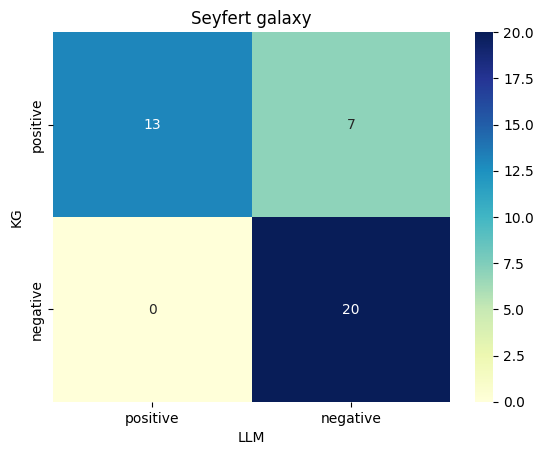

### LLM negative, KG positive

label,description,rationale
7C 114610.00+594129.00,7C 114610.00+594129.00,"The text does not provide any specific information about the entity 7C 114610.00+594129.00, therefore it is impossible to argue that 7C 114610.00+594129.00 is a Seyfert galaxy based solely on the provided definition and information."
NGC 6394,NGC 6394: NGC 6394 is a barred spiral galaxy located in the constellation Draco. It is designated as SBb in the galaxy morphological classification scheme and was discovered by the American astronomer Lewis A. Swift on 7 July 1885.,"The provided description of NGC 6394 does not provide enough information to assert that it is a Seyfert galaxy. The definition of a Seyfert galaxy includes characteristics such as having quasar-like nuclei with very high surface brightnesses, strong high-ionisation emission lines, detectable host galaxies, and supermassive black holes at their centers surrounded by accretion discs of in-falling material. The description of NGC 6394 only mentions that it is a barred spiral galaxy located in the constellation Draco, discovered by Lewis A. Swift. Without additional information about its characteristics, such as its luminosity, the presence of a supermassive black hole, or its emission lines, we cannot definitively classify NGC 6394 as a Seyfert galaxy based solely on the provided definition and description."
NGC 617,NGC 617,"The text does not provide any specific information about NGC 617 being a Seyfert galaxy. Therefore, based on the given information, it is not possible to provide an argument for the assertion that NGC 617 is a Seyfert galaxy."
NGC 169,"NGC 169: NGC 169 is a barred spiral galaxy located in the constellation Andromeda. It was discovered on September 18, 1857 by R. J. Mitchell.NGC 169 has a smaller companion named NGC 169A, also designated IC1559. The two are currently interacting, and the pair is included in Halton Arp's Atlas of Peculiar Galaxies.","The provided description of NGC 169 does not contain any information that would allow us to categorize it as a Seyfert galaxy based on the provided definition. The definition of Seyfert galaxies includes characteristics such as quasar-like nuclei with very high surface brightnesses, strong high-ionisation emission lines, clearly detectable host galaxies, and supermassive black holes at their centers surrounded by accretion discs of in-falling material. None of these characteristics are mentioned in the description of NGC 169. Therefore, based solely on the provided information, we cannot argue that NGC 169 is a Seyfert galaxy."
IC 9,IC 9,"The text does not provide any specific information about the entity IC 9, therefore it is impossible to determine or argue whether IC 9 is a Seyfert galaxy based solely on the provided definition and information."
Messier 94,"Messier 94: Messier 94 (also known as NGC 4736) is a spiral galaxy in the mid-northern constellation Canes Venatici. It was discovered by Pierre Méchain in 1781, and catalogued by Charles Messier two days later. Although some references describe M94 as a barred spiral galaxy, the \""bar\"" structure appears to be more oval-shaped. The galaxy has two ring structures.","The provided description of Messier 94 does not provide sufficient information to argue that it is a Seyfert galaxy. The definition of Seyfert galaxies includes characteristics such as quasar-like nuclei with very high surface brightnesses, strong high-ionisation emission lines, detectable host galaxies, and supermassive black holes at their centers surrounded by accretion discs of in-falling material. The description of Messier 94 mentions that it is a spiral galaxy with two ring structures, but does not provide information on any of the characteristics specific to Seyfert galaxies. Therefore, based solely on the provided information, an argument cannot be made that Messier 94 is a Seyfert galaxy."
NGC 3338,NGC 3338,"The text does not provide any specific information or characteristics about NGC 3338 tha

## Beer in Belgium (http://www.wikidata.org/entity/Q348229)

Beer in Belgium: Beer in Belgium includes pale ales, lambics, Flemish red ales, sour brown ales, strong ales and stouts. In 2018, there were 304 active breweries in Belgium, including international companies, such as AB InBev, and traditional breweries including Trappist monasteries. On average, Belgians drink 68 litres of beer each year, down from around 200 each year in 1900. Most beers are bought or served in bottles, rather than cans, and almost every beer has its own branded, sometimes uniquely shaped, glass. In 2016, UNESCO inscribed Belgian beer culture on their list of the intangible cultural heritage of humanity.

### Confusion matrix

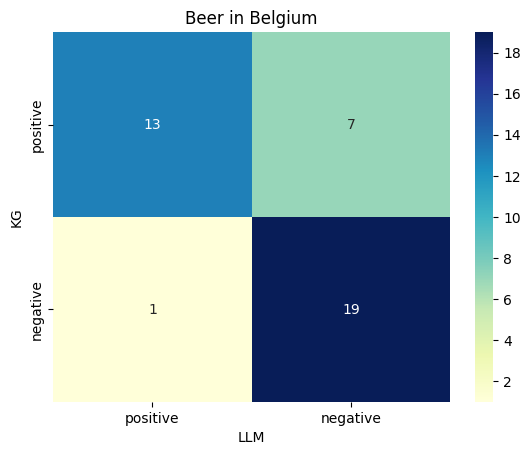

### LLM positive, KG negative

label,description,rationale
Maes pils,"Maes pils: Maes pils is a Belgian pils brewed by Alken-Maes. The beer was first produced in 1930 for Antwerp's Universal Exposition and called Prima Maezenbier. After Jupiler and Stella Artois, it is the third best-selling pilsner in Belgium. In 2008, Alken-Maes was taken over by the Dutch Heineken Brewery. In 2009, Alken-Maes changed the recipe of Maes Pils, resulting in a slight change in taste and a rise in the percentage of alcohol from 4.9% to 5.2%. To mark the change, Maes was rebranded with a new logo, a new embossed bottle, and a new descriptive slogan: \""Extra Mout/Extra Malt\"".","Maes pils is a beer in Belgium because it is a Belgian pils brewed by Alken-Maes, a brewery located in Belgium. The beer was first produced in Belgium in 1930 and continues to be a popular choice in the country, being the third best-selling pilsner. The fact that it is brewed in Belgium and consumed by Belgians aligns with the definition of Beer in Belgium, which includes a variety of beer types and breweries. Furthermore, the changes in its recipe and branding over the years, including a rise in alcohol percentage, suggest that it fits within the diverse and evolving beer culture in Belgium. Therefore, based on the provided definition, Maes pils can be considered a Beer in Belgium."


### LLM negative, KG positive

label,description,rationale
Abbaye de Cambron,Abbaye de Cambron,The text does not provide enough information to assert that Abbaye de Cambron is a Beer in Belgium.
Dominus,Dominus,"The definition does not provide any information that directly links the entity Dominus to the concept of Beer in Belgium. Therefore, based on the given information, it is not possible to provide an argument for the assertion that Dominus is a Beer in Belgium."
Saison de Pipaix,Saison de Pipaix,"The definition of Beer in Belgium includes a variety of types such as pale ales, lambics, Flemish red ales, sour brown ales, strong ales and stouts. While the specific type of beer that Saison de Pipaix is not mentioned, it is reasonable to infer that it could fall into one of these categories. Furthermore, the definition mentions that there were 304 active breweries in Belgium, which could include the brewery that produces Saison de Pipaix. Therefore, based on the information provided in the definition, it is plausible to assert that Saison de Pipaix is a Beer in Belgium."
3 Fonteinen Oude Kriek,3 Fonteinen Oude Kriek,"The definition of Beer in Belgium includes a variety of types such as pale ales, lambics, Flemish red ales, sour brown ales, strong ales and stouts. 3 Fonteinen Oude Kriek, as an entity, does not contradict any of these types and could potentially fall under one of these categories. Furthermore, the definition mentions that there are 304 active breweries in Belgium, which could include the brewery that produces 3 Fonteinen Oude Kriek. Therefore, it is plausible to assert that 3 Fonteinen Oude Kriek is a Beer in Belgium. However, without specific information linking 3 Fonteinen Oude Kriek to a Belgian brewery or beer type, this assertion remains an assumption."
Us Heit Dubbel Tarwe Bier,Us Heit Dubbel Tarwe Bier,"The definition does not provide any specific information about Us Heit Dubbel Tarwe Bier being a Beer in Belgium. Therefore, based on the given definition, it is not possible to argue that Us Heit Dubbel Tarwe Bier is a Beer in Belgium."
Oude Kriek Hanssens,Oude Kriek Hanssens,"The definition of Beer in Belgium includes a variety of types such as pale ales, lambics, Flemish red ales, sour brown ales, strong ales and stouts. Oude Kriek Hanssens, being an entity, could potentially fall under one of these categories. Furthermore, the definition mentions that there were 304 active breweries in Belgium, which could include the brewery that produces Oude Kriek Hanssens. Therefore, it is plausible to assert that Oude Kriek Hanssens is a Beer in Belgium."
St. Feuillien Saison,St. Feuillien Saison,"The definition of Beer in Belgium includes a variety of types such as pale ales, lambics, Flemish red ales, sour brown ales, strong ales and stouts. Although the specific type of beer that St. Feuillien Saison is not mentioned, it could potentially fall under one of these categories. Furthermore, the definition mentions that there were 304 active breweries in Belgium, and St. Feuillien Saison could be produced by one of these breweries. Therefore, based on the information provided in the definition, it is plausible to assert that St. Feuillien Saison is a Beer in Belgium."


## Fetus (http://www.wikidata.org/entity/Q26513)

Fetus: A fetus or foetus (; PL: fetuses, feti, foetuses, or foeti) is the unborn offspring that develops from an animal embryo. Following embryonic development the fetal stage of development takes place. In human prenatal development, fetal development begins from the ninth week after fertilization (or eleventh week gestational age) and continues until birth. Prenatal development is a continuum, with no clear defining feature distinguishing an embryo from a fetus. However, a fetus is characterized by the presence of all the major body organs, though they will not yet be fully developed and functional and some not yet situated in their final anatomical location.

### Confusion matrix

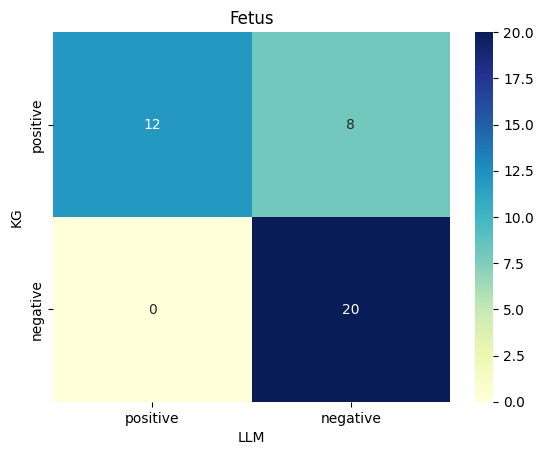

### LLM negative, KG positive

label,description,rationale
"Luísa Vitória, Princess of Grão-Pará","Luísa Vitória, Princess of Grão-Pará","Based on the provided definition and information, it is not possible to argue that Luísa Vitória, Princess of Grão-Pará is a fetus. The definition of a fetus refers to an unborn offspring in the stage of development from the ninth week after fertilization until birth. There is no information given about Luísa Vitória, Princess of Grão-Pará that suggests she is currently in this stage of development. Therefore, without additional information, we cannot assert that she is a fetus."
Wakatakayori-hime no Mikoto,Wakatakayori-hime no Mikoto,"The provided description does not provide any information about Wakatakayori-hime no Mikoto being a fetus. Therefore, based on the given information, it is not possible to argue that Wakatakayori-hime no Mikoto is a fetus."
Archduchess Maria Carolina of Austria,Archduchess Maria Carolina of Austria: Archduchess Maria Carolina of Austria (born and died 17 September 1748) was the tenth child and the seventh daughter of Empress Maria Theresa and Holy Roman Emperor Francis I.,"Based on the provided definition, a fetus is the unborn offspring that develops from an animal embryo, beginning from the ninth week after fertilization and continues until birth. Archduchess Maria Carolina of Austria, however, was born and died on 17 September 1748, which indicates that she was born and therefore, was no longer in the fetal stage of development. Therefore, based on the provided definition and information, it is not possible to argue that Archduchess Maria Carolina of Austria is a fetus."
Jessie Garon Presley,"Jessie Garon Presley: Elvis Aaron Presley (January 8, 1935 – August 16, 1977), often referred to mononymously as Elvis, was an American singer and actor. Known as the \""King of Rock and Roll\"", he is regarded as one of the most significant cultural figures of the 20th century. Presley's energized interpretations of songs and sexually provocative performance style, combined with a singularly potent mix of influences across color lines during a transformative era in race relations, led him to both great success and initial controversy. Presley was born in Tupelo, Mississippi, and relocated to Memphis, Tennessee, with his family when he was aged 13. His music career began there in 1954, recording at Sun Records with producer Sam Phillips, who wanted to bring the sound of African-American music to a wider audience. Presley, on rhythm acoustic guitar, and accompanied by lead guitarist Scotty Moore and bassist Bill Black, was a pioneer of rockabilly, an uptempo, backbeat-driven fusion of country music and rhythm and blues. In 1955, drummer D. J. Fontana joined to complete the lineup of Presley's classic quartet and RCA Victor acquired his contract in a deal arranged by Colonel Tom Parker, who would manage him for more than two decades. Presley's first RCA single, \""Heartbreak Hotel\"", was released in January 1956 and became a number-one hit in the United States. Within a year, RCA would sell ten million Presley singles. With a series of successful network television appearances and chart-topping records, Presley became the leading figure of the newly popular sound of rock and roll; though his performative style and promotion of the then-marginalized sound of African Americans led to him being widely considered a threat to the moral well-being of white American youth.In November 1956, Presley made his film debut in Love Me Tender. Drafted into military service in 1958, he relaunched his recording career two years later with some of his most commercially successful work. Presley held few concerts, however, and guided by Parker, proceeded to devote much of the 1960s to making Hollywood films and soundtrack albums, most of them critically derided. Some of his most famous films included Jailhouse Rock (1957), Blue Hawaii (1961), and Viva Las Vegas (1964). In 1968, following a seven-year break from live per

## Irregular galaxy (http://www.wikidata.org/entity/Q190397)

Irregular galaxy: An irregular galaxy is a galaxy that does not have a distinct regular shape, unlike a spiral or an elliptical galaxy. Irregular galaxies do not fall into any of the regular classes of the Hubble sequence, and they are often chaotic in appearance, with neither a nuclear bulge nor any trace of spiral arm structure.Collectively they are thought to make up about a quarter of all galaxies. Some irregular galaxies were once spiral or elliptical galaxies but were deformed by an uneven external gravitational force. Irregular galaxies may contain abundant amounts of gas and dust. This is not necessarily true for dwarf irregulars.Irregular galaxies are commonly small, about one tenth the mass of the Milky Way galaxy.  Due to their small sizes, they are prone to environmental effects like colliding with large galaxies and intergalactic clouds.



### Confusion matrix

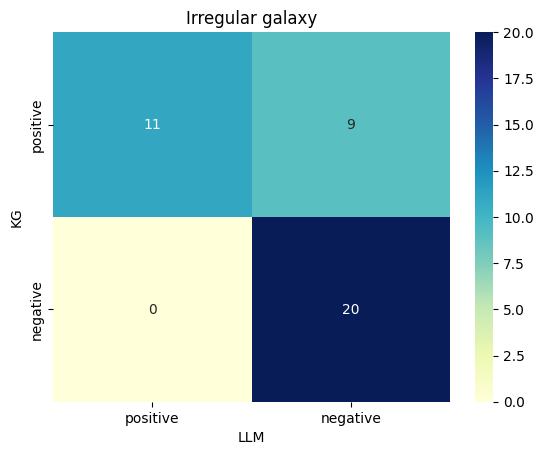

### LLM negative, KG positive

label,description,rationale
NGC 1800,NGC 1800,The text does not provide sufficient information to assert that NGC 1800 is an Irregular galaxy.
IC 3617,IC 3617,"The text does not provide any specific information about IC 3617, therefore it is impossible to determine whether IC 3617 is an irregular galaxy based solely on the provided definition and information."
IC 3518,IC 3518,"The text does not provide any specific information about IC 3518, therefore it is impossible to determine whether IC 3518 is an irregular galaxy based solely on the provided definition and information."
MCG-02-07-026,MCG-02-07-026,"The text does not provide any specific information about MCG-02-07-026, therefore it is impossible to determine whether MCG-02-07-026 is an irregular galaxy based on the given definition and information."
UGC 2014,UGC 2014,The text does not provide any specific information about UGC 2014 to argue that it is an irregular galaxy.
UGC 2182,UGC 2182,"The text does not provide any specific information about UGC 2182, therefore it is impossible to determine whether UGC 2182 is an irregular galaxy based solely on the provided definition and information."
ESO 249-27,ESO 249-27,"The text does not provide any specific information about ESO 249-27, therefore it is impossible to determine whether ESO 249-27 is an irregular galaxy based solely on the provided definition and information."
UGC 2664,UGC 2664,"The text does not provide any specific information about UGC 2664. Therefore, based on the information given, it is not possible to argue that UGC 2664 is an irregular galaxy."
NGC 3448,NGC 3448,The text does not provide enough information to assert that NGC 3448 is an Irregular galaxy.


## Fraud (http://www.wikidata.org/entity/Q28813)

Fraud: In law, fraud is intentional deception to secure unfair or unlawful gain, or to deprive a victim of a legal right. Fraud can violate civil law (e.g., a fraud victim may sue the fraud perpetrator to avoid the fraud or recover monetary compensation) or criminal law (e.g., a fraud perpetrator may be prosecuted and imprisoned by governmental authorities), or it may cause no loss of money, property, or legal right but still be an element of another civil or criminal wrong. The purpose of fraud may be monetary gain or other benefits, for example by obtaining a passport, travel document, or driver's license, or mortgage fraud, where the perpetrator may attempt to qualify for a mortgage by way of false statements.Internal fraud, also known as \"insider fraud\", is fraud committed or attempted by someone within an organisation such as an employee.A hoax is a distinct concept that involves deliberate deception without the intention of gain or of materially damaging or depriving a victim.

### Confusion matrix

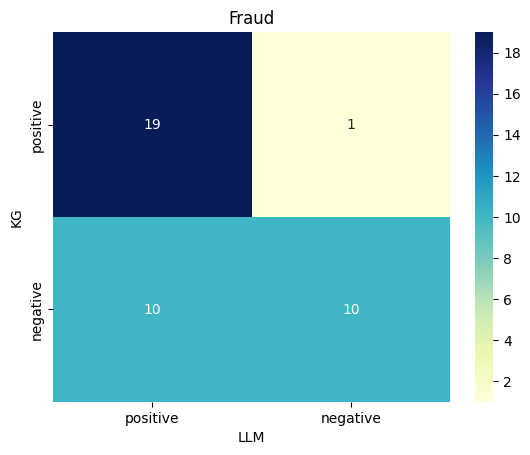

### LLM positive, KG negative

label,description,rationale
Action Replay,"Action Replay: Action Replay is the brand name of a cheating device (such as cheat cartridges) created by Datel. The Action Replay is available for many gaming systems including the Nintendo DS, Nintendo DSi, Nintendo 3DS, PlayStation Portable, PlayStation 2, GameCube, Game Boy Advance, and the Xbox. The name is derived from the first devices’ signature ability to pause the execution of the software and save the computer's state (the complete contents of the memory) to disk or tape for future “replay”. The ability to manipulate the contents of memory in this paused state permitted the cheat functions for which the brand is now better known.","Action Replay could be considered a form of fraud based on the definition provided. This is because it involves intentional deception to secure an unfair gain. In the context of gaming, this unfair gain could be winning a game, achieving a high score, or unlocking certain features that would otherwise require skill or time. The device manipulates the game's memory to alter the game state, which is a form of deception. Therefore, based on the definition of fraud, one could argue that Action Replay is a form of fraud."
Acámbaro figures,"Acámbaro figures: The Acámbaro figures are about 33,000 small ceramic figurines allegedly found by Waldemar Julsrud in July 1944, in the Mexican city of Acámbaro, Guanajuato. The figurines are said by some to resemble dinosaurs and are sometimes cited as anachronisms. Some young-Earth creationists have adduced the existence of figurines as credible evidence for the coexistence of dinosaurs and humans, in an attempt to cast doubt on scientific dating methods and potentially offer support for a literal interpretation of the Genesis creation narrative.However, there is no known reliable evidence for the validity of the Acámbaro figures as actual ancient artifacts; and many have questioned the motives of those who argue for their validity.","The Acámbaro figures could be considered a fraud based on the definition provided. The figures were allegedly found by Waldemar Julsrud and are said to resemble dinosaurs, which some young-Earth creationists have used as evidence for the coexistence of dinosaurs and humans. This could be seen as an intentional deception to secure an unfair or unlawful gain, as it attempts to cast doubt on scientific dating methods and potentially offer support for a literal interpretation of the Genesis creation narrative. However, there is no known reliable evidence for the validity of the Acámbaro figures as actual ancient artifacts. This lack of evidence, combined with the potential motive of those arguing for their validity, suggests that the Acámbaro figures could be a fraud."
Game Genie,"Game Genie: Game Genie is a line of video game cheat cartridges originally designed by Codemasters, sold by Camerica and Galoob. The first device in the series was released in 1990 for the Nintendo Entertainment System, with subsequent devices released for the Super NES, Game Boy, Genesis, and Game Gear. All Game Genie devices temporarily modify game data, allowing the player to do things unintended by developers such as, depending on the game, cheating, manipulating various aspects of games, and accessing unused assets and functions. Five million units of the original Game Genie products were sold worldwide, and most video game console emulators feature Game Genie code support. Emulators that have Game Genie support also allow a near-unlimited number of codes to be entered whereas the actual products have an upper and lower limit, between three and six codes. In 1993, Codemasters began development on a \""Game Genie 2\"", with Galoob to market and distribute the device in North America, but no Game Genie devices were released for the fifth generation of consoles. Other companies have produced similar hacking devices such as the Code Breaker, Action Replay, and Game Shark. The Game Genie brand was later revive

### LLM negative, KG positive

label,description,rationale
Kwangmyong,"Kwangmyong: Kwangmyong (lit. 'Bright Light') is a North Korean \""walled garden\"" national intranet service opened in the early 2000s. The Kwangmyong intranet system stands in contrast to the global Internet in North Korea, which is available to fewer people in the country.The network uses domain names under the .kp top level domain that are not usually accessible from the global Internet. As of 2016 the network uses IPv4 addresses reserved for private networks in the 10.0.0.0/8 range, also known as 24-bit block as defined in RFC 1918. North Koreans often find it more convenient to access sites by their IP address rather than by domain name using Latin characters. Like the global Internet, the network hosts content accessible with web browsers, and provides an internal web search engine. It also provides email services and news groups. The intranet is managed by the Korea Computer Center.","Based on the provided definition of fraud and the description of Kwangmyong, it is difficult to argue that Kwangmyong is a fraud. Fraud involves intentional deception to secure unfair or unlawful gain, or to deprive a victim of a legal right. The description of Kwangmyong does not indicate any intentional deception for unfair or unlawful gain. It is a national intranet service provided by North Korea, and while it is a ""walled garden"" and not accessible to the global internet, this does not necessarily constitute fraud. It is managed by the Korea Computer Center and provides services such as email and news groups. Therefore, without additional information suggesting deceptive practices or unlawful gain, it is not possible to argue that Kwangmyong is a fraud based on the provided definition and description."


## Child (http://www.wikidata.org/entity/Q7569)

Child: A child (PL: children) is a human being between the stages of birth and puberty, or between the developmental period of infancy and puberty. It may also refer to an unborn human being. The legal definition of child generally refers to a minor, otherwise known as a person younger than the age of majority. Children generally have fewer rights and responsibilities than adults. They are classed as unable to make serious decisions. 
Child may also describe a relationship with a parent (such as sons and daughters of any age) or, metaphorically, an authority figure, or signify group membership in a clan, tribe, or religion; it can also signify being strongly affected by a specific time, place, or circumstance, as in \"a child of nature\" or \"a child of the Sixties.\"

### Confusion matrix

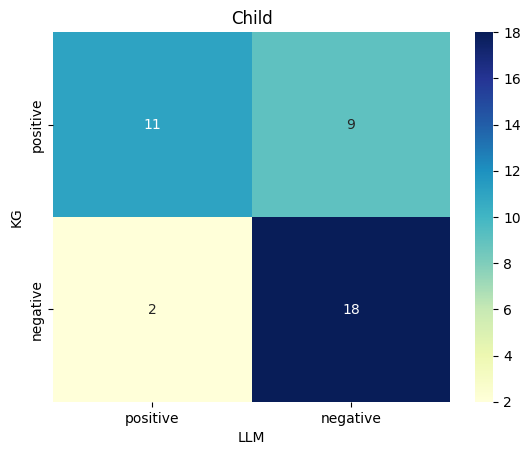

### LLM positive, KG negative

label,description,rationale
Sailor Saturn,"Sailor Saturn: Sailor Saturn (セーラーサターン, Sērā Satān) is a fictional supporting character in the Sailor Moon manga, the 1992-1997 anime series created by Naoko Takeuchi and the 2014-2023 reboot that more closely follows the manga. Her spirit resides deep within twelve-year-old Hotaru Tomoe (土萠 ほたる, Tomoe Hotaru), a frail middle schoolgirl who is her lookalike reincarnation, which makes Sailor Saturn her alter ego; entirely apart from how the other nine Sailor Guardians' are reborn and their human identities entirely separate. She is the tenth and last of the Sailor Guardians of the long gone Moon Kingdom to be introduced, possessing immensely strong dark powers associated with silence and ruin, nothingness and the void, destruction and death, annihilation and rebirth that made her a potential threat as she can wipe out a planet and even an entire Star System or reset its evolution. Her deathly powers are necessary for rejuvenation and re-creation to follow by Sailor Moon's mighty powers of healing and rejuvenation with powerful moonlight from the Silver Crystal.","Sailor Saturn is a child according to the provided definition because her spirit resides within twelve-year-old Hotaru Tomoe. The definition of a child includes a human being between the stages of birth and puberty, and a twelve-year-old would fall within this age range. Furthermore, the definition also states that children are generally unable to make serious decisions, which could be applicable to Sailor Saturn as her human identity is separate from her Sailor Guardian identity, suggesting a level of immaturity or lack of full autonomy. Therefore, based on the provided definition, Sailor Saturn can be considered a child."
Little Mermaid,Little Mermaid,"The Little Mermaid can be considered a child based on the definition provided. In the story, the Little Mermaid is depicted as a young mermaid who is experiencing life and making decisions that lead to her growth and development, similar to the stage between infancy and puberty in humans. She is also the daughter of the Sea King, which establishes a parent-child relationship. Furthermore, she is strongly affected by her specific circumstance of living under the sea and longing to be part of the human world, which aligns with the definition's mention of a child being strongly affected by a specific time, place, or circumstance."


### LLM negative, KG positive

label,description,rationale
Richieu Spiegelman,Richieu Spiegelman,"Without specific background knowledge about Richieu Spiegelman, it is impossible to definitively argue that he is a child based on the provided definition. However, if we assume that Richieu Spiegelman is a human being who is between the stages of birth and puberty, or between the developmental period of infancy and puberty, then he would fit the definition of a child. Additionally, if he is a minor, or a person younger than the age of majority, he would also be considered a child according to the legal definition. Furthermore, if he is a son or daughter of a parent, regardless of his age, he could be described as a child in relation to that parent."
Marion Stone,Marion Stone,"Without any specific information provided about Marion Stone in relation to the definition of a child, it is impossible to argue that Marion Stone is a child. The definition requires certain criteria to be met, such as being between the stages of birth and puberty, being a minor, or having a relationship with a parent or authority figure. Without any of this information about Marion Stone, no argument can be made."
Creche house Bayero University Kano state,Creche house Bayero University Kano state,"Based on the provided definition, it is not possible to argue that Creche house Bayero University Kano state is a Child. The definition of a child pertains to a human being in specific stages of development or in certain relationships. The Creche house Bayero University Kano state, as an entity, does not fit within this definition as it is a physical location or institution, not a human being."
Chartiste,Chartiste,"Without specific information about Chartiste relating to the definition of a child, it's impossible to provide a rationale for the assertion that Chartiste is a child."
Dzieciątko,Dzieciątko,"Without specific background knowledge about the entity Dzieciątko, it is impossible to definitively argue that Dzieciątko is a child based solely on the provided definition of a child. The definition requires the entity to be a human being between the stages of birth and puberty, an unborn human being, or a person younger than the age of majority. Without further information about Dzieciątko, we cannot determine if it fits any of these criteria."
Saturday Mthiyane,Saturday Mthiyane,"Without specific background knowledge about Saturday Mthiyane's age or stage of development, it is impossible to definitively argue that he is a child based on the provided definition. The definition requires that a child be between the stages of birth and puberty, or between the developmental period of infancy and puberty, or be an unborn human being. Without knowing Saturday Mthiyane's age or developmental stage, we cannot assert that he is a child."
Kamala,Kamala,"Without specific information about Kamala's age or relationship to a parent or authority figure, it is impossible to definitively argue that Kamala is a child based solely on the provided definition."
"Luísa Vitória, Princess of Grão-Pará","Luísa Vitória, Princess of Grão-Pará","The definition provided does not give specific information about the age or developmental stage of Luísa Vitória, Princess of Grão-Pará. Therefore, based solely on the information provided in the definition, it cannot be definitively argued that Luísa Vitória, Princess of Grão-Pará is a child."
Wakatakayori-hime no Mikoto,Wakatakayori-hime no Mikoto,The text does not provide enough information to assert that Wakatakayori-hime no Mikoto is a child.


## Embedded system (http://www.wikidata.org/entity/Q193040)

Embedded system: An embedded system is a computer system—a combination of a computer processor, computer memory, and input/output peripheral devices—that has a dedicated function within a larger mechanical or electronic system. It is embedded as part of a complete device often including electrical or electronic hardware and mechanical parts. 
Because an embedded system typically controls physical operations of the machine that it is embedded within, it often has real-time computing constraints.  Embedded systems control many devices in common use. In 2009, it was estimated that ninety-eight percent of all microprocessors manufactured were used in embedded systems.Modern embedded systems are often based on microcontrollers (i.e. microprocessors with integrated memory and peripheral interfaces), but ordinary microprocessors (using external chips for memory and peripheral interface circuits) are also common, especially in more complex systems. In either case, the processor(s) used may be types ranging from general purpose to those specialized in a certain class of computations, or even custom designed for the application at hand. A common standard class of dedicated processors is the digital signal processor (DSP).
Since the embedded system is dedicated to specific tasks, design engineers can optimize it to reduce the size and cost of the product and increase its reliability and performance. Some embedded systems are mass-produced, benefiting from economies of scale.
Embedded systems range in size from portable personal devices such as digital watches and MP3 players to bigger machines like home appliances, industrial assembly lines, robots, transport vehicles, traffic light controllers, and medical imaging systems. Often they constitute subsystems of other machines like avionics in aircraft and astrionics in spacecraft. Large installations like factories, pipelines and electrical grids rely on multiple embedded systems networked together. Generalized through software customization, embedded systems such as programmable logic controllers frequently comprise their functional units.
Embedded systems range from those low in complexity, with a single microcontroller chip, to very high with multiple units, peripherals and networks, which may reside in equipment racks or across large geographical areas connected via long-distance communications lines.



### Confusion matrix

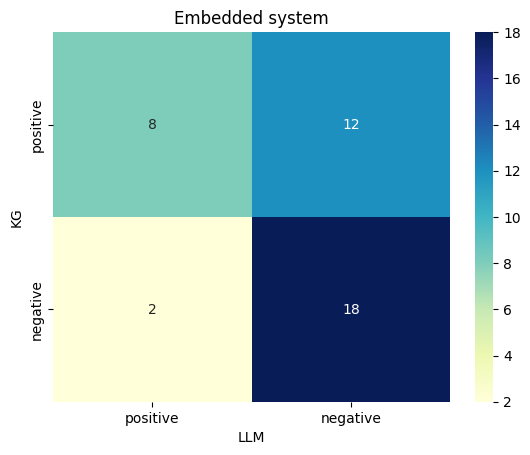

### LLM positive, KG negative

label,description,rationale
"BladeCenter HS21 Cluster, Xeon QC 2.66 GHz, GigEthernet","BladeCenter HS21 Cluster, Xeon QC 2.66 GHz, GigEthernet","The BladeCenter HS21 Cluster, Xeon QC 2.66 GHz, GigEthernet could be considered an embedded system based on the provided definition. It is a computer system that includes a computer processor, computer memory, and input/output peripheral devices. It is likely to have a dedicated function within a larger mechanical or electronic system, such as a data center or a network infrastructure. The BladeCenter HS21 Cluster, Xeon QC 2.66 GHz, GigEthernet could control physical operations of the machine it is embedded within and may have real-time computing constraints. It could be based on microcontrollers or ordinary microprocessors, and the processor(s) used may range from general purpose to those specialized in a certain class of computations. Therefore, based on the provided definition, it can be argued that the BladeCenter HS21 Cluster, Xeon QC 2.66 GHz, GigEthernet is an embedded system."
"BladeCenter LS20, Opteron 2.4 GHz Dual core, Infiniband","BladeCenter LS20, Opteron 2.4 GHz Dual core, Infiniband","The BladeCenter LS20, Opteron 2.4 GHz Dual core, Infiniband can be considered an embedded system based on the definition provided. It is a computer system that consists of a computer processor (Opteron 2.4 GHz Dual core), computer memory, and input/output peripheral devices (Infiniband). It can be dedicated to a specific function within a larger mechanical or electronic system, such as a data center or a network infrastructure. The BladeCenter LS20 can control physical operations of the machine it is embedded within, potentially having real-time computing constraints. It can be optimized by design engineers to reduce size and cost, increase reliability and performance, and can be mass-produced. Therefore, based on the provided definition, the BladeCenter LS20, Opteron 2.4 GHz Dual core, Infiniband can be classified as an embedded system."


### LLM negative, KG positive

label,description,rationale
Triforce,"Triforce: Sega is a video game developer, publisher, and hardware development company headquartered in Tokyo, Japan, with multiple offices around the world. The company's involvement in the arcade game industry began as a Japan-based distributor of coin-operated machines, including pinball games and jukeboxes. Sega imported second-hand machines that required frequent maintenance. This necessitated the construction of replacement guns, flippers, and other parts for the machines. According to former Sega director Akira Nagai, this is what led to the company into developing their own games.Sega released Pong-Tron, its first video-based game, in 1973. The company prospered from the arcade game boom of the late 1970s, with revenues climbing to over US$100 million by 1979. Nagai has stated that Hang-On and Out Run helped to pull the arcade game market out of the 1983 downturn and created new genres of video games.In terms of arcades, Sega is the world's most prolific arcade game producer, having developed more than 500 games, 70 franchises, and 20 arcade system boards since 1981. It has been recognized by Guinness World Records for this achievement. The following list comprises the various arcade system boards developed and used by Sega in their arcade games.","Based on the provided definitions and descriptions, there is no evidence or information to suggest that Triforce is an embedded system. The description of Triforce pertains to Sega, a video game developer and hardware development company, and its history in the arcade game industry. It does not mention anything about Triforce being a computer system with a dedicated function within a larger mechanical or electronic system, which is the definition of an embedded system. Therefore, it is not possible to argue that Triforce is an embedded system based on the given information."
Ikari Warriors,Ikari Warriors,"Based on the provided definition and without any additional information about Ikari Warriors, it is impossible to assert that Ikari Warriors is an embedded system. The definition of an embedded system involves a computer system with a dedicated function within a larger mechanical or electronic system, controlling physical operations of the machine it is embedded within. Without specific information about Ikari Warriors functioning in such a manner, we cannot classify it as an embedded system."
Sega Lindbergh,Sega Lindbergh,The text does not provide enough information to assert that Sega Lindbergh is an Embedded system.
Namco Warp & Warp,"Namco Warp & Warp: Namco was a video game developer and publisher, originally from Japan. Bandai Namco Entertainment is the successor to Namco and continues manufacturing and distributing video games worldwide. For Namco games released following the 2006 merger with Bandai's video game division, see List of Bandai Namco video games. For a list of franchises owned by Bandai Namco, see List of Bandai Namco video game franchises.","Based on the provided definition and information, it is not possible to argue that Namco Warp & Warp is an embedded system. The definition of an embedded system involves a computer system with a dedicated function within a larger mechanical or electronic system, often controlling physical operations of the machine it is embedded within. The description of Namco Warp & Warp, however, only mentions that it is a video game developed by Namco, with no information suggesting that it functions as an embedded system within a larger mechanical or electronic system. Therefore, without additional information, we cannot assert that Namco Warp & Warp is an embedded system."
Naomi 2,Naomi 2,The text does not provide enough information to assert that Naomi 2 is an Embedded system.
Namco System 86,"Namco System 86: Namco was a video game developer and publisher, originally from Japan. Bandai Namco Entertainment is the successor to Namco and continues manufacturing and distributing video games w

## Seaplane (http://www.wikidata.org/entity/Q115940)

Seaplane: A seaplane is a powered fixed-wing aircraft capable of taking off and landing (alighting) on water. Seaplanes are usually divided into two categories based on their technological characteristics: floatplanes and flying boats; the latter are generally far larger and can carry far more. Seaplanes that can also take off and land on airfields are in a subclass called amphibious aircraft, or amphibians.  Seaplanes were sometimes called hydroplanes, but currently this term applies instead to motor-powered watercraft that use the technique of hydrodynamic lift to skim the surface of water when running at speed.The use of seaplanes gradually tapered off after World War II, partially because of the investments in airports during the war but mainly because landplanes were less constrained by weather conditions that could result in sea states being too high to operate seaplanes while landplanes could continue to operate. In the 21st century, seaplanes maintain a few niche uses, such as for aerial firefighting, air transport around archipelagos, and access to undeveloped or roadless areas, some of which have numerous lakes.

### Confusion matrix

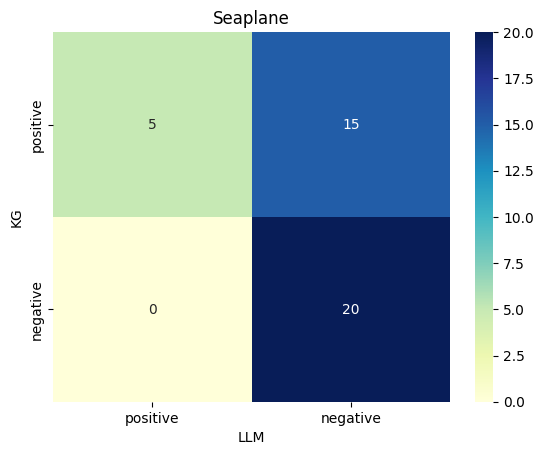

### LLM negative, KG positive

label,description,rationale
A-851,A-851,The text does not provide enough information to assert that A-851 is a Seaplane.
A-852,A-852,The text does not provide sufficient information to argue that A-852 is a Seaplane.
A-858,A-858,The text does not provide any information that could be used to argue that A-858 is a Seaplane.
A-1046,A-1046,The text does not provide enough information to assert that A-1046 is a Seaplane.
A-1043,A-1043,"Without any specific information provided about the entity A-1043, it is impossible to argue that A-1043 is a seaplane based solely on the definition provided. The definition of a seaplane does not inherently apply to A-1043 without additional context or information linking A-1043 to the characteristics of a seaplane."
A-1037,A-1037,"Without any specific information provided about the entity A-1037, it is impossible to argue that A-1037 is a seaplane based solely on the definition provided. The definition of a seaplane does not inherently apply to A-1037 without additional context or information linking the two."
Hamburg,Hamburg,"Based on the provided definition and information, it is not possible to argue that Hamburg is a seaplane. Hamburg is an entity, presumably referring to the city in Germany, and a seaplane is a type of aircraft that can take off and land on water. Therefore, Hamburg cannot be classified as a seaplane."
Ro X c/n 30,Ro X c/n 30,The text does not provide sufficient information to argue that Ro X c/n 30 is a Seaplane.
A-752,A-752,The text does not provide sufficient information to assert that A-752 is a Seaplane.
A-152,A-152,The text does not provide enough information to assert that A-152 is a seaplane.


## Plant variety (law) (http://www.wikidata.org/entity/Q1363241)

Plant variety (law): Plant variety is a legal term, following the International Union for the Protection of New Varieties of Plants (UPOV) Convention. Recognition of a cultivated plant (a cultivar) as a \"variety\" in this particular sense provides its breeder with some legal protection, so-called plant breeders' rights, depending to some extent on the internal legislation of the UPOV signatory countries, such as the Plant Variety Protection Act in the US.
This \"variety\" (which will differ in status according to national law) should not be confused with the international
taxonomic rank of \"variety\" (regulated by the International Code of Nomenclature for algae, fungi, and plants), nor with the term \"cultivar\" (regulated by the International Code of Nomenclature for Cultivated Plants).  Some horticulturists use \"variety\" imprecisely; for example, viticulturists almost always refer to grape cultivars as \"grape varieties\".

### Confusion matrix

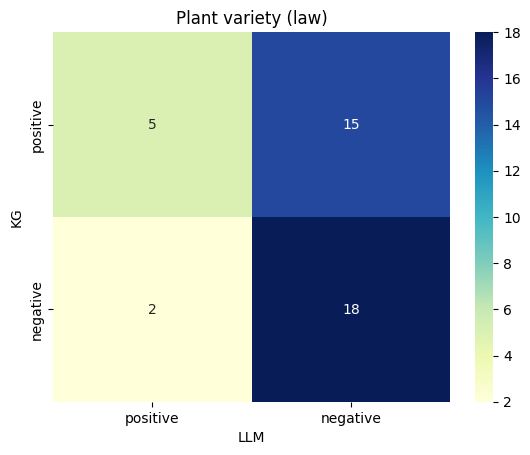

### LLM positive, KG negative

label,description,rationale
Chisel Jersey,Chisel Jersey: The 'Chisel Jersey' is a cultivar of cider apple originating in Somerset.,"The Chisel Jersey, as a cultivar of cider apple originating in Somerset, can be considered a ""variety"" in the legal sense as defined by the International Union for the Protection of New Varieties of Plants (UPOV) Convention. This is because it is a cultivated plant, which is the primary requirement for a plant to be recognized as a ""variety"" under this law. If the breeder of the Chisel Jersey sought legal protection for this cultivar, they could potentially receive plant breeders' rights, depending on the internal legislation of the UPOV signatory countries. Therefore, based on the provided definition, the Chisel Jersey can be argued to be a Plant variety (law)."
Major (cider apple),Major (cider apple): Major is a cider apple cultivar first grown in the United Kingdom in the area of Devon and Somerset.,"The Major (cider apple) is a cultivar, which is a type of cultivated plant. According to the definition of Plant variety (law), a cultivar can be recognized as a ""variety"" in the legal sense. This recognition provides the breeder with some legal protection, known as plant breeders' rights. Therefore, based on this definition, it can be argued that Major (cider apple) is a Plant variety (law) as it is a cultivar that could potentially be recognized as a ""variety"" and thus be granted legal protection under the law."


### LLM negative, KG positive

label,description,rationale
Cleopatra,Cleopatra,"The provided definition and information do not support the assertion that Cleopatra is a Plant variety (law). Cleopatra is not mentioned in the definition, and there is no information to suggest that Cleopatra is a cultivated plant or a breeder's rights protected variety. Therefore, based on the given information, it is not possible to argue that Cleopatra is a Plant variety (law)."
Hawkeye (ciruela),Hawkeye (ciruela),"The definition provided for Plant variety (law) states that it is a legal term used to recognize a cultivated plant as a ""variety"" which provides its breeder with some legal protection, known as plant breeders' rights. This recognition and protection depend on the internal legislation of the UPOV signatory countries. However, the text does not provide any specific information about Hawkeye (ciruela) being recognized as a ""variety"" under this law or about its breeder's rights. Therefore, based solely on the provided definition, it is not possible to argue that Hawkeye (ciruela) is a Plant variety (law). More information about Hawkeye (ciruela)'s legal status and breeder's rights would be needed to make this assertion."
African Rose,African Rose,"The definition provided does not give enough information to definitively argue that the African Rose is a Plant variety (law). The definition explains that a plant variety in the legal sense is a cultivated plant that is recognized as a ""variety"" under the International Union for the Protection of New Varieties of Plants (UPOV) Convention, providing the breeder with some legal protection. However, the definition does not specify whether the African Rose is a cultivated plant recognized under the UPOV Convention. Therefore, based solely on the provided definition, it cannot be argued that the African Rose is a Plant variety (law)."
Prunus salicina 'Alhambra',Prunus salicina 'Alhambra',"The entity Prunus salicina 'Alhambra' appears to be a specific type of cultivated plant, or a cultivar. According to the definition provided, a cultivar that is recognized as a ""variety"" in the context of the International Union for the Protection of New Varieties of Plants (UPOV) Convention is provided with certain legal protections, known as plant breeders' rights. Therefore, if Prunus salicina 'Alhambra' is recognized as a ""variety"" under this convention, it would be considered a plant variety in the legal sense. However, the definition does not provide specific information about whether Prunus salicina 'Alhambra' has been recognized as a ""variety"" under the UPOV Convention, so further information would be needed to confirm this assertion."
Heron,Heron,"The assertion that Heron is a Plant variety (law) cannot be made based on the provided definition. The definition of Plant variety (law) refers to a legal term used to recognize and protect a cultivated plant or a cultivar. Heron, however, is not a plant or a cultivar but a type of bird. Therefore, it cannot be classified as a Plant variety (law) according to the given definition."
Comox,Comox,"The provided definition does not give any information about Comox being a plant variety under the law. Therefore, based on the given information, it is not possible to provide an argument for the assertion that Comox is a plant variety under the law."
Belle of Leuven,Belle of Leuven,"The definition provided does not give any specific information about the entity ""Belle of Leuven"". Therefore, based solely on the information given in the definition, it is not possible to provide an argument for the assertion that ""Belle of Leuven"" is a Plant variety (law). More information about ""Belle of Leuven"" would be needed to determine if it meets the criteria outlined in the definition."
Boyuela,Boyuela,"The provided information does not give any specific details about Boyuela being a plant variety in the legal sense. Therefore, based on the given information, it is not possible to provide an ar

In [7]:
for experiment in experiment_df["experiment"].values:
    display_experiment(experiment)